# Premier League Regression Analysis

### Import Libraries

In [17]:
# Import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy as stats
import scipy

### Load Data

In [18]:
# Read in csv
df = pd.read_csv("Data/EPL_Soccer_MLR_LR.csv")

# Preview data
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


### EDA

In [19]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [20]:
# Get basic descriptive statistics
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [21]:
# View the correlation between score and our feature variables
df.corr()

/var/folders/dy/jf6_98vd5sn7lcgfvc6hj8h80000gn/T/ipykernel_73260/1483440703.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


In [22]:
# Visulaize score vs. cost
import plotly.express as px
px.scatter(df, x="Cost", y="Score", trendline='ols', template="plotly_dark", height=400, width=650, title="Score vs. Cost")

### Build and Train the Model

In [23]:
# Assign target and features
X = df.Cost
y = df.Score

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size=0.25, random_state=42)

In [24]:
# Define model
lr = sm.OLS(y_train, X_train).fit()

# Display parameters and summary
display(lr.params)
lr.summary()

Cost    0.186289
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3602.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                    1.54e-47
Time:                        04:32:14   Log-Likelihood:                         -99.302
No. Observations:                  50   AIC:                                      200.6
Df Residuals:                      49   BIC:                                      202.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1863      0.003     60.018      0.000       0.180       0.193
==============================================================================
Omnibus:                        1.657   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                0.842
Skew:                           0.153   Prob(JB):                        0.656
Kurtosis:                       3.557   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#force intercept term
X_train_with_intercept = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_with_intercept).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     696.7
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           3.13e-30
Time:                        04:32:14   Log-Likelihood:                -96.077
No. Observations:                  50   AIC:                             196.2
Df Residuals:                      48   BIC:                             200.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3547      0.527      2.571      0.013       0.295       2.414
Cost           0.1714      0.006     26.395      0.000       0.158       0.184
==============================================================================
Omnibus:                        3.475   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                2.565
Skew:                           0.533   Prob(JB):                        0.277
Kurtosis:                       3.311   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visualize Results

In [26]:
# Exrtact parameters
b0 = lr.params[0]
b1 = lr.params[1]

# Plot the fitted line on the training data 
import plotly.graph_objects as go
fig = px.scatter(x=X_train, y=y_train, template="plotly_dark", height=400, width=650, title="Regression Line on Training Data")
fig.add_traces(go.Scatter(x=X_train, y=b0+ b1*X_train,showlegend=False))
fig.update_layout(
    xaxis_title="Cost",
    yaxis_title="Score",

)
fig.show()

In [27]:
# Plot the fitted line on the testing data 
X_test_with_intercept = sm.add_constant(X_test)
y_pred = lr.predict(X_test_with_intercept)

fig = px.scatter(x=X_test, y=y_test, template="plotly_dark", height=400, width=650, title="Regression Line on Testing Data")
fig.add_traces(go.Scatter(x=X_test, y=y_pred,showlegend=False))
fig.update_layout(
    xaxis_title="Cost",
    yaxis_title="Score",
)

### Regression Diagnostics

In [28]:
# Predict on training data
y_preds = lr.predict(X_train_with_intercept)

# Calculate residuals
r_i = (y_train - y_preds)

# Plot Residuals vs Cost
fig = px.scatter(x=X_train, y=r_i, template="plotly_dark", height=400, width=650, title="Residuals vs. Cost")
fig.update_layout(xaxis_title="Cost", yaxis_title="Residuals")

In [29]:
# Absolute residuals vs. cost
abs_r_i = np.abs(y_train - y_preds)

fig = px.scatter(x=X_train, y=abs_r_i, template="plotly_dark", height=400, width=650, title="Abs Residuals vs. Cost")
fig.update_layout(xaxis_title="Cost", yaxis_title="Abs Residuals")

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([-3.39905015, -3.2046159 , -2.39880953, -1.78233881, -1.77911944,
         -1.72297195, -1.69656671, -1.51915371, -1.50906804, -1.30915371,
         -1.3079552 , -1.30745836, -1.20043787, -1.07668816, -0.98901665,
         -0.97100325, -0.95288552, -

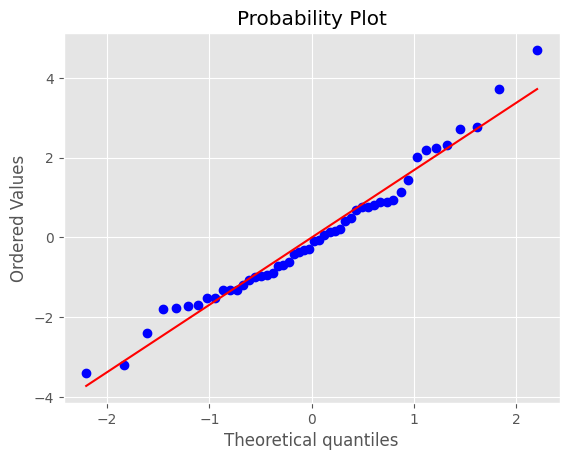

In [30]:
#Normality plot
scipy.stats.probplot(r_i,plot=plt)

/var/folders/dy/jf6_98vd5sn7lcgfvc6hj8h80000gn/T/ipykernel_73260/2988103135.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'y_train - y_train_pred')

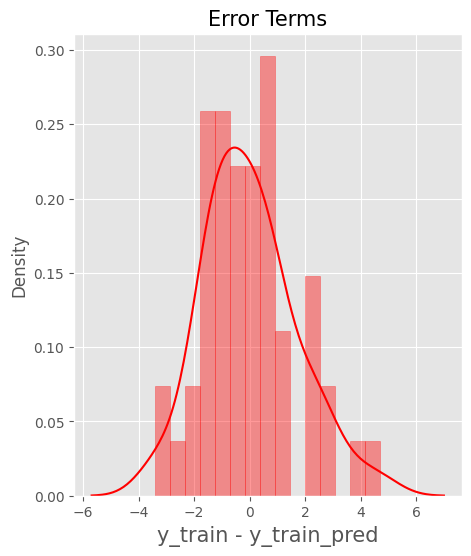

In [31]:
# Plot histogram using residual values
plt.figure(figsize=(5,6))
plt.style.use('ggplot')
sns.distplot(r_i, bins=15, color="r", hist_kws=dict(edgecolor="r"))
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)

In [32]:
fig = px.box(y=r_i, template="plotly_dark", height=500, width=500, title="Residual Boxplot")
fig.show()